In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Product_details - Copy.csv to Product_details - Copy.csv


In [4]:
import os
import io
import pandas as pd

dataset = pd.read_csv(io.BytesIO(uploaded[r'Product_details - Copy.csv']))
print(dataset)

      Text_ID                                Product_Description  \
0        3057  The Web DesignerÛªs Guide to iOS (and Android...   
1        6254  RT @mention Line for iPad 2 is longer today th...   
2        8212  Crazy that Apple is opening a temporary store ...   
3        4422  The lesson from Google One Pass: In this digit...   
4        5526  RT @mention At the panel: &quot;Your mom has a...   
...       ...                                                ...   
6359     2945  Thanks @mention for hosting this event #sxsw #...   
6360     4528  SXSW iPhone app is awesome, but iPad app crash...   
6361     6526  RT @mention RT @mention Download 20+ free trac...   
6362     2110  OH at Texas Social Media Awards: 'You don't ne...   
6363     2177  #Google launching a &quot;major&quot; new soci...   

      Product_Type  Sentiment  
0                9          2  
1                9          2  
2                9          2  
3                9          2  
4                9     

In [5]:
dataset.head(20)

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
5,6064,RT @mention I think my effing hubby is in line...,6,1
6,7713,&quot;Android users are not iPhone users. (The...,9,2
7,2975,Wow! RT@mention We interrupt your regularly sc...,9,3
8,818,Google to Launch New Social Network Called Cir...,9,2
9,1318,@mention Welcome! Enjoy #Sxsw and ride anywhe...,9,2


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB
None


In [8]:
print(dataset["Product_Description"].iloc[0:100])

0     The Web DesignerÛªs Guide to iOS (and Android...
1     RT @mention Line for iPad 2 is longer today th...
2     Crazy that Apple is opening a temporary store ...
3     The lesson from Google One Pass: In this digit...
4     RT @mention At the panel: &quot;Your mom has a...
                            ...                        
95    #LonelyPlanet #Austin iPhone app is a (free!) ...
96    Download of the Day: Lonely Planet Austin, Fre...
97    @mention ÛÏ@mention Does the pop up Apple sto...
98    Heading to free Google-sponsored happy hour fo...
99    Like @mention Download 'Freak Jet' on your iPh...
Name: Product_Description, Length: 100, dtype: object


In [9]:
print(dataset.Product_Type.unique())

[9 6 7 2 8 3 0 5 1 4]


In [10]:
print(dataset.Sentiment.unique())


[2 1 3 0]


In [13]:
#NLP PREPROCESSING
sample_review = dataset["Product_Description"].iloc[0:100]
print(sample_review)

0     The Web DesignerÛªs Guide to iOS (and Android...
1     RT @mention Line for iPad 2 is longer today th...
2     Crazy that Apple is opening a temporary store ...
3     The lesson from Google One Pass: In this digit...
4     RT @mention At the panel: &quot;Your mom has a...
                            ...                        
95    #LonelyPlanet #Austin iPhone app is a (free!) ...
96    Download of the Day: Lonely Planet Austin, Fre...
97    @mention ÛÏ@mention Does the pop up Apple sto...
98    Heading to free Google-sponsored happy hour fo...
99    Like @mention Download 'Freak Jet' on your iPh...
Name: Product_Description, Length: 100, dtype: object


In [14]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

0     The Web DesignerÛªs Guide to iOS (and Android...
1     RT @mention Line for iPad 2 is longer today th...
2     Crazy that Apple is opening a temporary store ...
3     The lesson from Google One Pass: In this digit...
4     RT @mention At the panel: &quot;Your mom has a...
                            ...                        
95    #LonelyPlanet #Austin iPhone app is a (free!) ...
96    Download of the Day: Lonely Planet Austin, Fre...
97    @mention ÛÏ@mention Does the pop up Apple sto...
98    Heading to free Google-sponsored happy hour fo...
99    Like @mention Download 'Freak Jet' on your iPh...
Name: Product_Description, Length: 100, dtype: object


In [18]:
pattern = r"\&\#[0-9]+\;"

dataset["preprocessed"] = dataset["Product_Description"].str.replace(pat=pattern, repl="", regex=True)

print(dataset["preprocessed"].iloc[0:100])

0     The Web DesignerÛªs Guide to iOS (and Android...
1     RT @mention Line for iPad 2 is longer today th...
2     Crazy that Apple is opening a temporary store ...
3     The lesson from Google One Pass: In this digit...
4     RT @mention At the panel: &quot;Your mom has a...
                            ...                        
95    #LonelyPlanet #Austin iPhone app is a (free!) ...
96    Download of the Day: Lonely Planet Austin, Fre...
97    @mention ÛÏ@mention Does the pop up Apple sto...
98    Heading to free Google-sponsored happy hour fo...
99    Like @mention Download 'Freak Jet' on your iPh...
Name: preprocessed, Length: 100, dtype: object


In [21]:
%%time
import re
import nltk
nltk.download('omw-1.4')

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
dataset["preprocessed"] = dataset["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(dataset["preprocessed"].iloc[0:100])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


0     The Web DesignerÛªs Guide to iOS and Android ...
1     RT @ mention Line for iPad 2 be long today tha...
2     Crazy that Apple be open a temporary store in ...
3     The lesson from Google One Pass : In this digi...
4     RT @ mention At the panel : & quot ; Your mom ...
                            ...                        
95    # LonelyPlanet # Austin iPhone app be a free g...
96    Download of the Day : Lonely Planet Austin Fre...
97    @ mention ÛÏ @ mention Does the pop up Apple ...
98    Heading to free Google-sponsored happy hour fo...
99    Like @ mention Download Freak Jet on your iPho...
Name: preprocessed, Length: 100, dtype: object
CPU times: user 10.3 s, sys: 173 ms, total: 10.5 s
Wall time: 11.3 s


In [22]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

dataset["preprocessed"] = dataset["preprocessed"].apply(remove_accent)

print(dataset["preprocessed"].iloc[0:100])


0     The Web DesignerUas Guide to iOS and Android A...
1     RT @ mention Line for iPad 2 be long today tha...
2     Crazy that Apple be open a temporary store in ...
3     The lesson from Google One Pass : In this digi...
4     RT @ mention At the panel : & quot ; Your mom ...
                            ...                        
95    # LonelyPlanet # Austin iPhone app be a free g...
96    Download of the Day : Lonely Planet Austin Fre...
97    @ mention UI @ mention Does the pop up Apple s...
98    Heading to free Google-sponsored happy hour fo...
99    Like @ mention Download Freak Jet on your iPho...
Name: preprocessed, Length: 100, dtype: object


In [24]:
pattern = r"[^\w\s]"

dataset["preprocessed"] = dataset["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(dataset["preprocessed"].iloc[0:100])

0     The Web DesignerUas Guide to iOS and Android A...
1     RT   mention Line for iPad 2 be long today tha...
2     Crazy that Apple be open a temporary store in ...
3     The lesson from Google One Pass   In this digi...
4     RT   mention At the panel     quot   Your mom ...
                            ...                        
95      LonelyPlanet   Austin iPhone app be a free g...
96    Download of the Day   Lonely Planet Austin Fre...
97      mention UI   mention Does the pop up Apple s...
98    Heading to free Google sponsored happy hour fo...
99    Like   mention Download Freak Jet on your iPho...
Name: preprocessed, Length: 100, dtype: object


In [25]:
dataset["preprocessed"] = dataset["preprocessed"].str.lower()

print(dataset["preprocessed"].iloc[0:100])


0     the web designeruas guide to ios and android a...
1     rt   mention line for ipad 2 be long today tha...
2     crazy that apple be open a temporary store in ...
3     the lesson from google one pass   in this digi...
4     rt   mention at the panel     quot   your mom ...
                            ...                        
95      lonelyplanet   austin iphone app be a free g...
96    download of the day   lonely planet austin fre...
97      mention ui   mention does the pop up apple s...
98    heading to free google sponsored happy hour fo...
99    like   mention download freak jet on your ipho...
Name: preprocessed, Length: 100, dtype: object


In [26]:
#REMOVING STOP WORDS
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
dataset["preprocessed"] = dataset["preprocessed"].apply(remove_stop_words)

print(dataset["preprocessed"].iloc[0:100])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

0     web designeruas guide ios android apps today  ...
1     rt   mention line ipad 2 long today yesterday ...
2     crazy apple open temporary store austin tomorr...
3     lesson google one pass   digital environment u...
4     rt   mention panel     quot   mom ipad design ...
                            ...                        
95      lonelyplanet   austin iphone app free godsen...
96    download day   lonely planet austin free limit...
97      mention ui   mention pop apple store austin ...
98    heading free google sponsored happy hour seman...
99    like   mention download freak jet iphone hilar...
Name: preprocessed, Length: 100, dtype: object


In [27]:
#REMOVE EXTRA SPACES
pattern = r"[\s]+"

dataset["preprocessed"] = dataset["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(dataset["preprocessed"].iloc[0:100])

0     web designeruas guide ios android apps today m...
1     rt mention line ipad 2 long today yesterday sx...
2     crazy apple open temporary store austin tomorr...
3     lesson google one pass digital environment use...
4     rt mention panel quot mom ipad design boomer q...
                            ...                        
95     lonelyplanet austin iphone app free godsend g...
96    download day lonely planet austin free limited...
97     mention ui mention pop apple store austin sti...
98    heading free google sponsored happy hour seman...
99    like mention download freak jet iphone hilario...
Name: preprocessed, Length: 100, dtype: object


In [28]:
#TOKENIZATION
corpora = dataset["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[0:100])

[['web', 'designeruas', 'guide', 'ios', 'android', 'apps', 'today', 'mention', '10', 'link', 'sxsw'], ['rt', 'mention', 'line', 'ipad', '2', 'long', 'today', 'yesterday', 'sxsw', 'get', 'line', 'today', 'fun'], ['crazy', 'apple', 'open', 'temporary', 'store', 'austin', 'tomorrow', 'handle', 'rabid', 'sxsw', 'eye', 'pad', 'seeker'], ['lesson', 'google', 'one', 'pass', 'digital', 'environment', 'user', 'want', 'purchase', 'across', 'every', 'platform', 'one', 'tool', 'sxsw', 'elonsxsw'], ['rt', 'mention', 'panel', 'quot', 'mom', 'ipad', 'design', 'boomer', 'quot', 'sxsw'], ['rt', 'mention', 'think', 'eff', 'hubby', 'line', 'ipad', '2', 'someone', 'point', 'towards', 'line', 'wife', 'number', '2', 'sxswi', 'sxsw'], ['', 'quot', 'android', 'user', 'iphone', 'user', 'use', 'options', 'menu', 'contextual', 'menu', 'quot', 'mention', 'sxsw'], ['wow', 'rt', 'mention', 'interrupt', 'regularly', 'schedule', 'sxsw', 'geek', 'program', 'big', 'news', 'link', 'google', 'circle'], ['google', 'launch

In [29]:
#PHRASE MODELING
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [30]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['umm', 'pager', 'sxswk', 'mbp', 'lucky', 'whitelists', 'techcrunch', 'clif', 'callooh', 'confusion', 'sweater', 'hint', '30mio', 'syd', 'plucked', 'copyright', 'yum', 'connectivity', 'evolve', 'referential', 'yourmom', 'liquid', 'stepping', 'major', 'surui', 'convention', 'loved', 'oooh', 'planes', 'sandwiched', 'fact', 'speed', 'papyrus', 'incognito', 'right', 'chance', 'beevil', 'bff', 'brand', 'regretting', 'muffin', '99a', 'u', 'shang', 'galaxys4g', 'strum', 'proper', 'slice', 'niche', 'drinks']


In [31]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'mention_sxsw', 'link_sxsw', 'mention_google', 'rt_mention', 'link_', '_mention', 'sxsw_link', 'mention_mention']


In [32]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [35]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

In [36]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[0:100])

[['web', 'designeruas', 'guide', 'ios', 'android', 'apps', 'today', 'mention', '10', 'link', 'sxsw'], ['rt', 'mention', 'line', 'ipad', 'long', 'today', 'yesterday', 'sxsw', 'get', 'line', 'today', 'fun'], ['crazy', 'apple', 'open', 'temporary', 'store', 'austin', 'tomorrow', 'handle', 'rabid', 'sxsw', 'eye', 'pad', 'seeker'], ['lesson', 'google', 'one', 'pass', 'digital', 'environment', 'user', 'want', 'purchase', 'across', 'every', 'platform', 'one', 'tool', 'sxsw', 'elonsxsw'], ['rt', 'mention', 'panel', 'quot', 'mom', 'ipad', 'design', 'boomer', 'quot', 'sxsw'], ['rt', 'mention', 'think', 'eff', 'hubby', 'line', 'ipad', 'someone', 'point', 'towards', 'line', 'wife', 'number', 'sxswi', 'sxsw'], ['quot', 'android', 'user', 'iphone', 'user', 'use', 'options', 'menu', 'contextual', 'menu', 'quot', 'mention', 'sxsw'], ['wow', 'rt', 'mention', 'interrupt', 'regularly', 'schedule', 'sxsw', 'geek', 'program', 'big', 'news', 'link', 'google', 'circle'], ['google', 'launch', 'new', 'social',

In [ ]:
#Creating the Vocabulary


In [38]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:100]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: 10
ID: 1, Token: android
ID: 2, Token: apps
ID: 3, Token: designeruas
ID: 4, Token: guide
ID: 5, Token: ios
ID: 6, Token: link
ID: 7, Token: mention
ID: 8, Token: sxsw
ID: 9, Token: today
ID: 10, Token: web
ID: 11, Token: fun
ID: 12, Token: get
ID: 13, Token: ipad
ID: 14, Token: line
ID: 15, Token: long
ID: 16, Token: rt
ID: 17, Token: yesterday
ID: 18, Token: apple
ID: 19, Token: austin
ID: 20, Token: crazy
ID: 21, Token: eye
ID: 22, Token: handle
ID: 23, Token: open
ID: 24, Token: pad
ID: 25, Token: rabid
ID: 26, Token: seeker
ID: 27, Token: store
ID: 28, Token: temporary
ID: 29, Token: tomorrow
ID: 30, Token: across
ID: 31, Token: digital
ID: 32, Token: elonsxsw
ID: 33, Token: environment
ID: 34, Token: every
ID: 35, Token: google
ID: 36, Token: lesson
ID: 37, Token: one
ID: 38, Token: pass
ID: 39, Token: platform
ID: 40, Token: purchase
ID: 41, Token: tool
ID: 42, Token: user
ID: 43, Token: want
ID: 44, Token: boomer
ID: 45, Token: design
ID: 46, Token: mom
ID: 47, To

In [ ]:
#Count-based Feature Engineering
#In order for a machine learning model to work with text input, the document must first be vectorized. This simply means that the input has to be converted into containers of numerical values.

#Bag of Words Model
#The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The bow model for the sample review is below:

In [39]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: 10, Frequency: 1
Word: android, Frequency: 1
Word: apps, Frequency: 1
Word: designeruas, Frequency: 1
Word: guide, Frequency: 1
Word: ios, Frequency: 1
Word: link, Frequency: 1
Word: mention, Frequency: 1
Word: sxsw, Frequency: 1
Word: today, Frequency: 1
Word: web, Frequency: 1


In [40]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[100]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: 10, Weight: 0.314
Word: android, Weight: 0.189
Word: apps, Weight: 0.259
Word: designeruas, Weight: 0.606
Word: guide, Weight: 0.364
Word: ios, Weight: 0.389
Word: link, Weight: 0.053
Word: mention, Weight: 0.043
Word: sxsw, Weight: 0.001
Word: today, Weight: 0.189
Word: web, Weight: 0.327


In [ ]:
#Word Embedding for Feature Engineering

In [41]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

CPU times: user 11.5 s, sys: 138 ms, total: 11.6 s
Wall time: 7.23 s


In [ ]:
#Final Dataframe
#The goal is to have a dataframe with observations corresponding to the product reviews. The word_vec model is used to gather all the unique tokens in the corpora. This enables us to generate the word_vec_df which makes use of the dimensions as the features of every word.

In [42]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
web,-1.055149,-0.355790,1.742081,0.027768,-1.694518,0.597842,-1.484085,0.212143,-1.046982,0.920158,...,3.249830,-0.490162,2.352396,1.825306,-1.425602,0.906374,-0.791963,-0.925152,-0.970711,0.301422
designeruas,-0.024559,-0.039135,0.216524,-0.075540,-0.052239,-0.005516,0.078363,-0.067526,0.092436,0.048366,...,-0.066719,-0.086731,0.115023,0.002751,0.030199,0.110877,0.070630,-0.091746,-0.115419,0.055287
guide,-1.297366,0.102435,1.788707,0.367234,-1.542228,0.462398,-1.173173,0.396851,-0.233652,-0.502030,...,-0.080972,-1.688930,1.856589,-0.609985,-0.104788,1.070530,1.374680,0.416339,-3.614370,-0.140536
ios,-0.084319,-1.014423,-0.403412,-0.510446,-0.821732,0.521365,-0.099468,0.966853,0.161553,0.613318,...,-0.009909,0.677521,0.548113,0.349287,-0.019658,0.120178,-0.054449,0.019553,-0.434149,0.265307
android,-2.008487,-1.866407,1.924446,-0.515924,-3.083828,1.755001,0.050564,3.718158,2.899344,0.997601,...,1.330093,0.075414,-1.096574,3.205679,1.314293,-0.849765,-0.426362,1.623528,-3.436973,-2.499998


In [43]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

CPU times: user 6.86 s, sys: 84.3 ms, total: 6.94 s
Wall time: 6.87 s


In [44]:
model_df = pd.DataFrame(model_array)
model_df["label"] = dataset["Product_Type"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.530882,0.152591,1.388786,-0.178562,-0.779329,0.828424,-0.030091,0.403315,0.276747,-0.084954,...,-0.968632,0.597524,0.305875,-0.233179,0.215175,0.645885,-0.318965,-1.406000,0.294067,9
1,-0.028607,1.692998,0.675410,0.183485,0.233441,0.535107,0.623195,0.292324,-0.245174,-0.883453,...,-0.629793,-0.811862,-0.115957,-0.699400,-0.021534,0.408482,-0.228906,-0.578139,0.144392,9
2,0.418808,0.881292,0.027538,0.170112,0.666907,0.397094,0.997401,0.070555,-0.169673,-0.744339,...,-0.455673,-0.611784,-1.072800,-0.730516,0.446756,1.106526,-0.075372,-1.134128,0.236108,9
3,0.255359,0.452517,0.354283,0.056107,-0.430867,0.786192,0.049900,-0.005307,-0.167137,-0.262968,...,-0.314858,-0.028168,-0.235628,-0.363859,-0.314200,-0.131833,-0.335417,-0.530385,0.433126,9
4,0.203507,0.511112,1.385156,-0.184047,0.005716,0.747427,-0.392413,-0.139157,-0.978597,-1.055195,...,-0.885778,0.192066,0.761579,-1.800947,-0.753351,0.375518,-1.075449,-1.103943,1.051060,9


In [45]:
model_df = pd.DataFrame(model_array)
model_df["label"] = dataset["Sentiment"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.530882,0.152591,1.388786,-0.178562,-0.779329,0.828424,-0.030091,0.403315,0.276747,-0.084954,...,-0.968632,0.597524,0.305875,-0.233179,0.215175,0.645885,-0.318965,-1.406000,0.294067,2
1,-0.028607,1.692998,0.675410,0.183485,0.233441,0.535107,0.623195,0.292324,-0.245174,-0.883453,...,-0.629793,-0.811862,-0.115957,-0.699400,-0.021534,0.408482,-0.228906,-0.578139,0.144392,2
2,0.418808,0.881292,0.027538,0.170112,0.666907,0.397094,0.997401,0.070555,-0.169673,-0.744339,...,-0.455673,-0.611784,-1.072800,-0.730516,0.446756,1.106526,-0.075372,-1.134128,0.236108,2
3,0.255359,0.452517,0.354283,0.056107,-0.430867,0.786192,0.049900,-0.005307,-0.167137,-0.262968,...,-0.314858,-0.028168,-0.235628,-0.363859,-0.314200,-0.131833,-0.335417,-0.530385,0.433126,2
4,0.203507,0.511112,1.385156,-0.184047,0.005716,0.747427,-0.392413,-0.139157,-0.978597,-1.055195,...,-0.885778,0.192066,0.761579,-1.800947,-0.753351,0.375518,-1.075449,-1.103943,1.051060,2


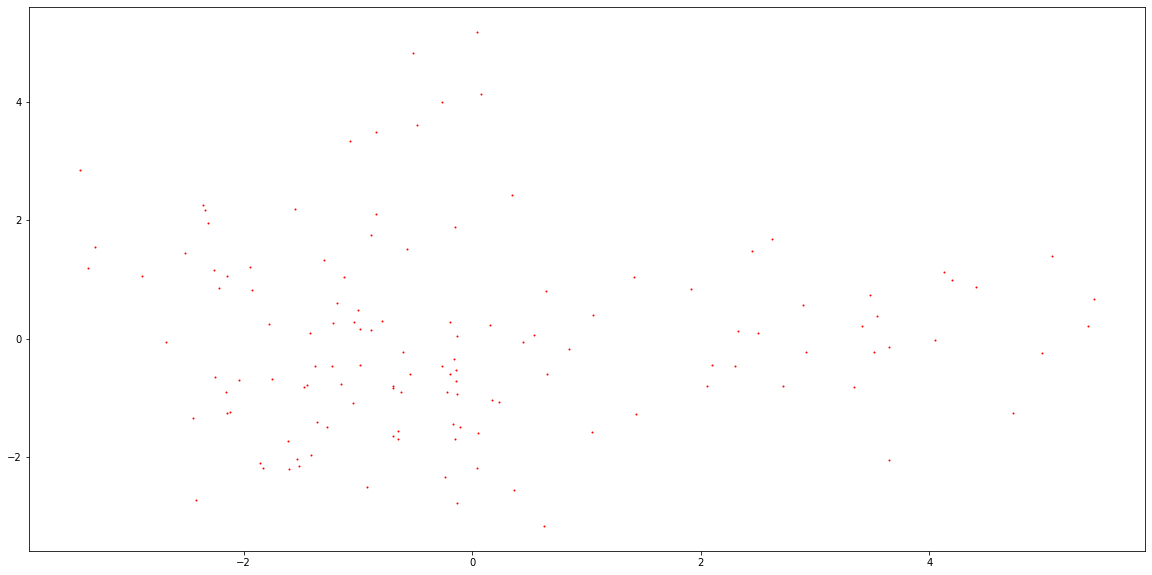

In [52]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
#

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color='red', s=1)
plt.show()

In [ ]:

#More on Word2Vec

In [56]:
word_bank = ["nook", "phone", "tv", "good", "price" ]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

nook: ['curve' 'purse' 'detection' 'iradar' 'cobra']
phone: ['cell' 'mobilefarm' 'farmer' 'gadgetoverload' 'blackberry']
tv: ['bitrate' 'petricone' 'winelibrary' 'service' 'xbox']
good: ['uselessobservations' 'ridic' 'field' 'several' 'typing']
price: ['banana' 'triple' 'doom' 'buck' 'dyac']


In [ ]:
#TSNE

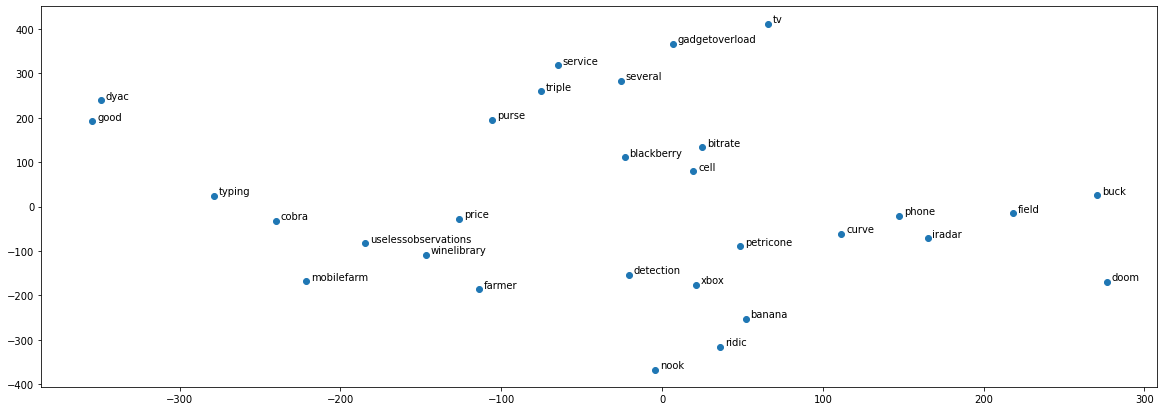

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

In [63]:
helpful = dataset["Product_Description"].tolist()
most_helpful = max(helpful, key=lambda x: x[0])

most_helpful_idx = dataset["Product_Description"].astype(str) == str(most_helpful)
most_helpful_idx = dataset[most_helpful_idx].index

most_helpful_text = dataset["Product_Description"].iloc[most_helpful_idx].values[0]

print(most_helpful_text)

Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}


In [64]:
%%time
import spacy

from collections import defaultdict

ner = spacy.load("en")

ner_helpful = ner(most_helpful_text)

ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")

OSError: ignored

In [60]:
#Topic Modeling
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

sxsw 0.07860551
mention 0.04559049
link 0.027505485
ipad 0.021512905
google 0.020765897
CPU times: user 10.9 s, sys: 668 ms, total: 11.6 s
Wall time: 15.7 s


In [61]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 sxsw, 0.07860551029443741
 mention, 0.045590490102767944
 link, 0.027505485340952873
 ipad, 0.02151290513575077
 google, 0.020765896886587143

Topic 2:
 sxsw, 0.07407867163419724
 mention, 0.03331521898508072
 ipad, 0.029736801981925964
 link, 0.025818603113293648
 google, 0.02105124667286873

Topic 3:
 mention, 0.09337899088859558
 sxsw, 0.07354994118213654
 link, 0.05687014386057854
 rt, 0.04698697105050087
 google, 0.03928631544113159

Topic 4:
 sxsw, 0.07072896510362625
 mention, 0.049096785485744476
 link, 0.02658114954829216
 amp, 0.02547183632850647
 google, 0.024145351722836494

Topic 5:
 sxsw, 0.07837569713592529
 mention, 0.057606618851423264
 quot, 0.038823485374450684
 google, 0.02498897910118103
 ipad, 0.02189667522907257

Topic 6:
 mention, 0.07277197390794754
 sxsw, 0.07121691107749939
 google, 0.043979451060295105
 link, 0.02659258246421814
 rt, 0.025629039853811264

Topic 7:
 sxsw, 0.07919158041477203
 mention, 0.0753958523273468
 rt, 0.03543280437588692
 li